# Pycaret

In [ ]:
# !pip install pycaret==2.3.10

In [ ]:
# pip install jinja2==3.1.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/customer')

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from pycaret import regression

import customer_data

def NMAE(true, pred):
    mae = mean_absolute_error(true,pred)
    score = mae / np.mean(np.abs(true))
    return score

In [2]:
train, test, _, _ = customer_data.load_data(test_size=0,encoding=False)
train.drop(['id'], axis=1, inplace=True)
train.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Age_Range,Complain,Days_Customer,Education,Income,Income_Level,Income_Per,Kidhome,Marital_Status,NumAcceptedCmp,NumCatalogPurchases,NumDealsPurchases,NumPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Perferred_Purchase,Recency,Response,Teenhome,target
0,0,0,0,0,0,48,4,0,3267,3,46014.0,0.283343,23007.0,1,3,0,1,7,26,7,7,7,2,21,0,1,541
1,0,0,1,0,0,60,6,0,2779,2,76624.0,0.775727,76624.0,0,2,1,7,1,23,7,5,1,1,68,0,1,899
2,0,0,0,0,0,71,7,0,3190,2,75903.0,0.667373,75903.0,0,1,0,6,2,23,7,6,3,2,50,0,1,901
3,0,0,0,0,0,48,4,0,2835,1,18393.0,0.113259,9196.5,1,1,0,0,2,8,3,3,7,0,2,0,0,50
4,1,0,0,0,0,76,7,0,2762,4,64014.0,0.562840,21338.0,2,3,1,2,7,22,5,7,7,0,56,0,1,444


In [3]:
model = regression.setup(data=train, target='target',train_size=0.7,session_id=0,silent=True)

,Description,Value
0,session_id,0
1,Target,target
2,Original Data,"(1102, 27)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,19
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(771, 84)"


In [4]:
top_3_models = regression.compare_models(sort='MAE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,119.2249,45561.2966,210.6706,0.8727,0.2949,0.2497,0.851
rf,Random Forest Regressor,121.3852,44981.6231,208.0954,0.8744,0.2999,0.2644,1.066
lightgbm,Light Gradient Boosting Machine,125.1921,46212.4703,212.3504,0.8701,0.4043,0.3232,0.234
gbr,Gradient Boosting Regressor,136.2127,50461.9128,222.1339,0.8586,0.4281,0.4111,0.229
lasso,Lasso Regression,163.5432,56094.7564,233.7488,0.8416,0.7899,1.1185,0.061
ridge,Ridge Regression,164.3338,57111.6082,235.5991,0.8399,0.7647,1.0835,0.041
br,Bayesian Ridge,165.5231,56211.7851,234.0070,0.8415,0.7896,1.1459,0.041
dt,Decision Tree Regressor,166.5709,90114.9659,298.2307,0.7455,0.3791,0.2900,0.040
lr,Linear Regression,168.8059,58383.6031,237.9872,0.8358,0.8287,1.1864,0.571
llar,Lasso Least Angle Regression,173.7172,60028.3190,242.3012,0.8319,0.7278,1.0286,0.522


In [5]:
blended = regression.blend_models(estimator_list=top_3_models, fold=10, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,114.2695,43343.8623,208.1919,0.8818,0.2790,0.2410
1,109.7578,32839.8217,181.2176,0.9029,0.2603,0.2175
2,117.5147,44974.3447,212.0716,0.8904,0.2135,0.1705
3,96.4603,23850.6193,154.4365,0.8887,0.2409,0.1966
4,92.2530,25458.5005,159.5572,0.9386,0.1987,0.1530
5,126.8673,44540.2806,211.0457,0.8943,0.2712,0.2205
6,105.7114,34393.5917,185.4551,0.8993,0.2892,0.2383
7,104.1977,38008.8776,194.9587,0.8813,0.3008,0.2627
8,123.5531,57093.0279,238.9415,0.8078,0.4932,0.4953


In [6]:
final_blended = regression.finalize_model(blended)
pred_train = regression.predict_model(final_blended, data=train)
true_pred = pd.DataFrame([train['target'],pred_train['Label']]).T
true_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,26.151,2108.3518,45.9168,0.9942,0.1289,0.0742


,target,Label
0,541.0,540.416784
1,899.0,920.396443
2,901.0,979.537631
3,50.0,51.798428
4,444.0,467.653884


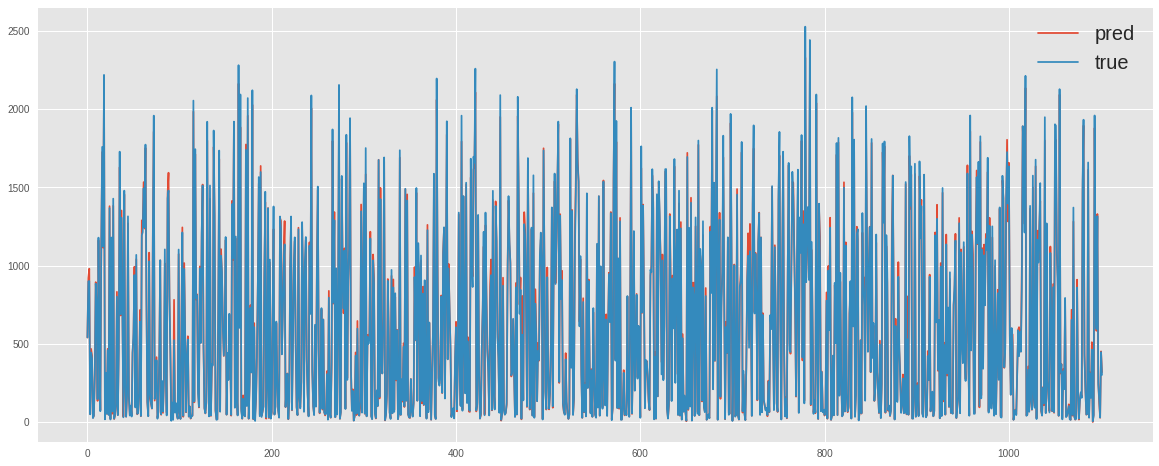

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 8))
plt.plot(true_pred['Label'], label='pred')
plt.plot(true_pred['target'], label='true')
plt.legend(fontsize=20)
plt.show()

In [ ]:
_, _, _, validation_set = customer_data.load_data()
x_train, x_test, y_train, y_test = validation_set
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(771, 86) (331, 86) (771, 1) (331, 1)


In [ ]:
model.fit(x_train, y_train)
print('train NAME',NMAE(y_train,model.predict(x_train)))
print('test NAME',NMAE(y_test,model.predict(x_test)))

train NAME 0.044059207967595986
test NAME 0.19539829222599706


## Submission

In [8]:
sample = pd.read_csv('original_data/sample_submission.csv')
pred_test = regression.predict_model(final_blended, data=test)
sample['target'] = pred_test['Label']
sample.head()

,id,target
0,0,587.880784
1,1,917.900420
2,2,720.730989
3,3,1303.489528
4,4,1348.064898


In [9]:
sample.to_csv('sample_pycaret.csv',index=False)

In [10]:
regression.save_model(final_blended, 'model_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                             colsample_bytree=1.0,
                                                             importance_type='split',
                                                             learning_rate=0.1,
                                                             max

In [ ]:
from google.colab import files
files.download('sample_pycaret.csv')
files.download('model_pycaret.pkl')